In [1]:
import argparse
import time
import numpy as np

import brainflow
from brainflow.board_shim import BoardShim, BrainFlowInputParams
from brainflow.data_filter import DataFilter, FilterTypes, AggOperations

import dynarray
   

params = BrainFlowInputParams () # default parameters, I suppose?
params.serial_port = '/dev/ttyUSB0' # board DEV

BoardShim.enable_board_logger() # so it's like that... shoddy, no?

In [2]:
board = BoardShim(2, params)
board.prepare_session ()

In [76]:
board.start_stream(250, '')

In [77]:
board.enable_dev_board_logger()

In [79]:
begin=time.time()

times=[]
shapes=[]
packet_ids=[]
timestamps=[]
packets=[]

d = dynarray.DynamicArray((None, 31))

import time
times_called=0
times_processed=0
while time.time() < begin + 60*10:
    times_called += 1
    
    if board.get_board_data_count():
        m=board.get_board_data()
        d.extend(m.T)
        shapes.append(m.shape[1])
        timestamps.extend(m[30])
        packet_ids.extend(m[0])
    


In [86]:
d.shrink_to_fit()

In [87]:
inds=range(9379, 9385)

In [99]:
plt.figure()
plt.plot(inds, d[inds,1:16])

In [100]:
plt.vlines([9381, 9382], *plt.ylim())

In [80]:
board.stop_stream()

In [81]:
board.release_session()

In [82]:
import matplotlib.pyplot as plt
%matplotlib qt

In [83]:
# investigate packet issues
plt.figure();plt.plot(np.diff(packet_ids)%256)

In [84]:
# investigate incoming shapes n stuff
plt.figure();plt.plot(shapes)

In [35]:
packet_ids[52755:52765]

[53.0, 55.0, 57.0, 59.0, 61.0, 63.0, 63.0, 67.0, 69.0, 71.0]

In [26]:
times_called/times_processed

4.316582037022111

In [90]:
import matplotlib.pyplot as plt
%matplotlib qt
plt.figure();
plt.plot(m[0])

In [ ]:
plt.ylim

In [ ]:
board = BoardShim(2, params)
board.prepare_session ()

In [4]:
board.start_stream(125*60*10, '')
time.sleep(60*10)

In [5]:
m=board.get_board_data()

In [6]:
m.shape

(31, 74999)

In [13]:
import matplotlib.pyplot as plt
%matplotlib qt

In [14]:
plt.figure()
plt.plot(np.diff(m[0])%256)

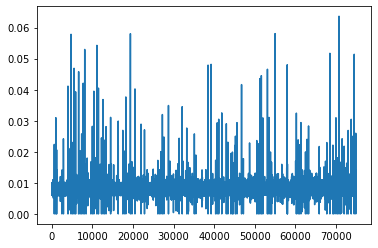

In [12]:
plt.figure()
plt.plot(np.diff(m[30]))

In [10]:
board.stop_stream()

In [11]:
board.release_session()

In [77]:
board.enable_dev_board_logger()

In [159]:
board.get_eeg_channels(board.board_id)

[1, 2, 3, 4, 5, 6, 7, 8]

In [140]:
board.get_accel_channels(0)

[9, 10, 11]

In [162]:
board.get_package_num_channel(board.board_id)

0

In [153]:
for i in range(12, 18):

    plt.figure()
    plt.plot(m[i,:])


In [158]:
board.board_id

0

In [146]:
board.get_other_channels(0)

[12, 13, 14, 15, 16, 17, 18]

In [149]:
board.get_accel_channels(0)

[9, 10, 11]

In [154]:
# let's find missing packets:
np.diff(m[0, :])%256 != 1.0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [107]:
np.diff(m[0, :])%255

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

0

In [81]:
plt.figure()
plt.plot(m[22,:] - m[22,0])

In [44]:
m.shape

(31, 124)

In [53]:
plt.figure(); plt.plot(m[[2, 3],:].T)

In [101]:
board.stop_stream()

In [102]:
board.release_session()

In [77]:
board.get_other_channels(2)

[20, 21, 22, 23, 24, 25, 26]

In [66]:
import matplotlib.pyplot as plt
%matplotlib qt
plt.figure();plt.imshow(d[0:16])

In [75]:
plt.figure();plt.plot(np.diff(time.time() - d[30]))

In [49]:
board.stop_stream()

In [4]:
time.sleep (10)
# data = board.get_current_board_data (256) # get latest 256 packages or less, doesnt remove them from internal buffer

In [4]:
while True:
    data = board.get_board_data () # get all data and remove it from internal buffer
    
    
board.stop_stream()
board.release_session()

    print (data)

In [18]:
default_16_ch_names = ['Fp1',  'Fp2',  'C3',  'C4',  'T5',  'T6',  'O1',  'O2',  'F7',  'F8',  'F3',  'F4',  'T3',  'T4',  'P3',  'P4']
default_8_ch_names = ['Fp1', 'Fp2', 'C3', 'C4', 'T5', 'T6', 'O1', 'O2']


default_data_encoding = 'float32'

default_eeg_stream_name = 'openbci_eeg'
default_aux_stream_name = 'openbci_aux'
random_number = random.randint(0, 999)
default_eeg_stream_identifier = 'openbci_eeg_id{:3d}'.format(random_number)
default_aux_stream_identifier = 'openbci_aux_id{:3d}'.format(random_number)

if board.get_sampling_rate(2) == 125:
    ch_names = default_16_ch_names
elif board.get_sampling_rate(2) == 250:
    ch_names = default_16_ch_names

other_channels = ['X','Y','Z']

In [ ]:
# make the info for the EEG:
info_eeg = pylsl.StreamInfo(default_eeg_stream_name, 'EEG', len(ch_names), board.get_sampling_rate(2), 'float32', default_eeg_stream_identifier)
chns = info_eeg.desc().append_child("channels")
for label in ch_names:
    ch = chns.append_child("channel")
    ch.append_child_value("label", label)
    ch.append_child_value("unit", "microvolts")
    ch.append_child_value("type", "EEG")

# make the info for the AUX:
info_aux = pylsl.StreamInfo(default_aux_stream_name, 'AUX', len(ch_names), board.get_sampling_rate(2), 'float32', default_aux_stream_identifier)
chns = info_aux.desc().append_child("channels")
for label in other_channels:
    ch = chns.append_child("channel")
    ch.append_child_value("label", label)
    ch.append_child_value("unit", "microvolts")
    ch.append_child_value("type", "EEG")

    
outlet_eeg = pylsl.StreamOutlet(info_eeg)
outlet_aux = pylsl.StreamOutlet(info_aux)

In [2]:
import numpy as np

In [4]:
import math

In [6]:
import random

'335'

In [ ]:
# to make a LSL outlet, we need to set all kinds of parameters.

    info = pylsl.StreamInfo('Playback-3', 'EEG', len(raw.ch_names), raw.info['sfreq'], 'float32', 'someidentifier123')

    chns = info.desc().append_child("channels")
    for label in raw.ch_names:
        ch = chns.append_child("channel")
        ch.append_child_value("label", label)
        ch.append_child_value("unit", "microvolts")
        ch.append_child_value("type", "EEG")

    outlet = pylsl.StreamOutlet(info)


def send_it(data_file):

    import mne
    # data_file = '/home/johan/nf/nf-rtime/Projects_Templates/3_RTMRICWL/trial_data_for_mri_cwl_development.set'

    raw = mne.io.read_raw_eeglab(data_file).resample(500)
    raw_scaling = [item['cal'] for item in raw.info['chs']]
    sfreq=raw.info['sfreq']
    
    print(raw)
    # create info for our purposes:
    info = pylsl.StreamInfo('Playback-3', 'EEG', len(raw.ch_names), raw.info['sfreq'], 'float32', 'someidentifier123')

    chns = info.desc().append_child("channels")
    for label in raw.ch_names:
        ch = chns.append_child("channel")
        ch.append_child_value("label", label)
        ch.append_child_value("unit", "microvolts")
        ch.append_child_value("type", "EEG")

    outlet = pylsl.StreamOutlet(info)

    # time_to_send_new_data_point = time.time()
    # time_to_wait_between_sending_data_points = 1/sfreq

    begin_time = time.time()
    current_time = 0.0
    all_data = raw.get_data().T / raw_scaling

    inds_sent = np.zeros(raw.last_samp+1, dtype=bool)
    while current_time < raw.last_samp/raw.info['sfreq']:

        inds_current = raw.times < current_time
        bool_slice = inds_current & ~inds_sent
        if bool_slice.any():
            b=np.min(np.where(bool_slice)[0])
            e=np.max(np.where(bool_slice)[0])+1


            stamp = pylsl.local_clock()-0.125
            outlet.push_chunk(all_data[b:e,:].tolist(), stamp)
            inds_sent = inds_sent | inds_current

            no_data_time=0

        time.sleep(0.01)
        current_time = time.time() - begin_time

    print('We are done sending this data')
    del(outlet)
        